In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
blood_dinov2s = pd.read_csv('logs/training_log_20241107_011553_blood_dinov2_s.txt', sep=" - |, ", engine="python",
                            names=["Timestamp", "Epoch", "Training Loss", "Validation mAP"])
blood_clipbase = pd.read_csv('logs/training_log_20241106_235746_blood_clip_base.txt', sep=" - |, ", engine="python",
                             names=["Timestamp", "Epoch", "Training Loss", "Validation mAP"])

cppe_dinov2s = pd.read_csv('logs/training_log_20241107_013052_cppe_dinov2_s.txt', sep=" - |, ", engine="python",
                           names=["Timestamp", "Epoch", "Training Loss", "Validation mAP"])
cppe_clipbase = pd.read_csv('logs/training_log_20241107_001259_cppe_clip_base.txt', sep=" - |, ", engine="python",
                            names=["Timestamp", "Epoch", "Training Loss", "Validation mAP"])

for df in [blood_dinov2s, blood_clipbase, cppe_dinov2s, cppe_clipbase]:
    df["Epoch"] = df["Epoch"].str.extract(r'(\d+)').astype(int)
    df["Training Loss"] = df["Training Loss"].str.extract(r'([\d.]+)').astype(float)
    df["Validation mAP"] = df["Validation mAP"].str.extract(r'([\d.]+)').astype(float)

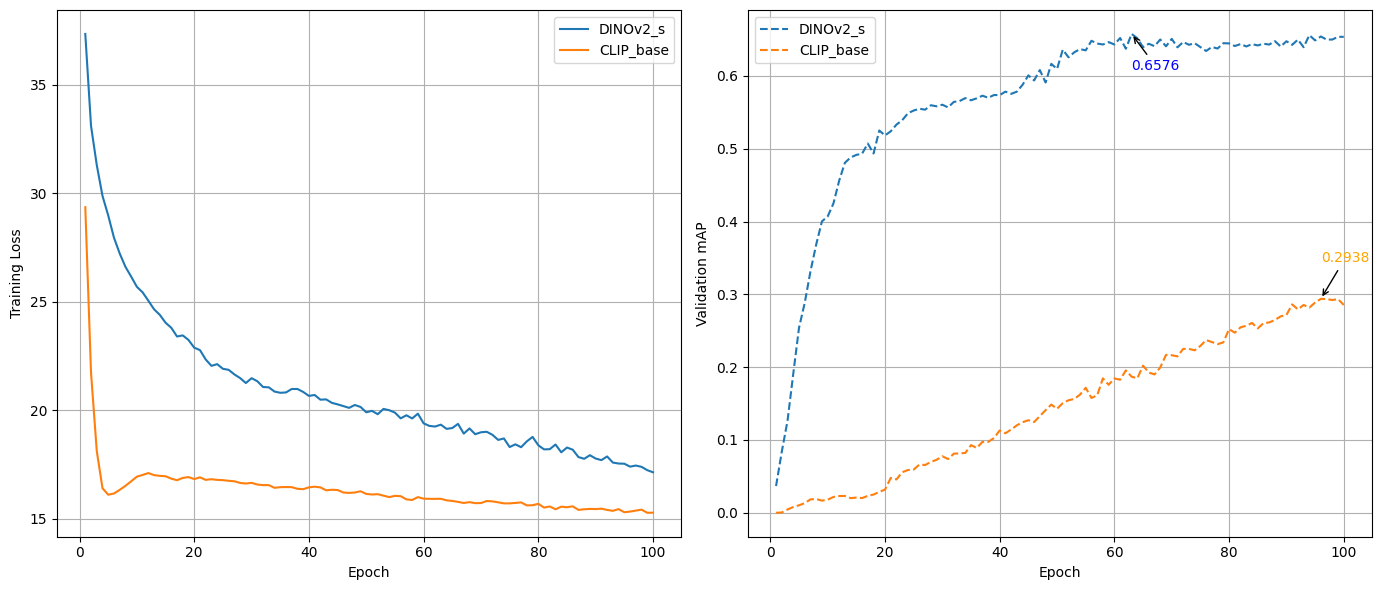

In [91]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(blood_dinov2s["Epoch"], blood_dinov2s["Training Loss"], label="DINOv2_s", linestyle='-')
plt.plot(blood_clipbase["Epoch"], blood_clipbase["Training Loss"], label="CLIP_base", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(blood_dinov2s["Epoch"], blood_dinov2s["Validation mAP"], label="DINOv2_s", linestyle='--')
plt.plot(blood_clipbase["Epoch"], blood_clipbase["Validation mAP"], label="CLIP_base", linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Validation mAP")
plt.legend()
plt.grid()


max_mAP_dino = blood_dinov2s["Validation mAP"].max()
max_epoch_dino = blood_dinov2s["Epoch"][blood_dinov2s["Validation mAP"].idxmax()]
plt.annotate(f'{max_mAP_dino:.4f}', 
             xy=(max_epoch_dino, max_mAP_dino), 
             xytext=(max_epoch_dino + 0, max_mAP_dino - 0.05),
             arrowprops=dict(arrowstyle="->"), color='blue')

max_mAP_clip = blood_clipbase["Validation mAP"].max()
max_epoch_clip = blood_clipbase["Epoch"][blood_clipbase["Validation mAP"].idxmax()]
plt.annotate(f'{max_mAP_clip:.4f}', 
             xy=(max_epoch_clip, max_mAP_clip), 
             xytext=(max_epoch_clip + 0, max_mAP_clip + 0.05),
             arrowprops=dict(arrowstyle="->"), color='orange')

plt.tight_layout()
plt.savefig("blood.png", dpi=300)
plt.show()

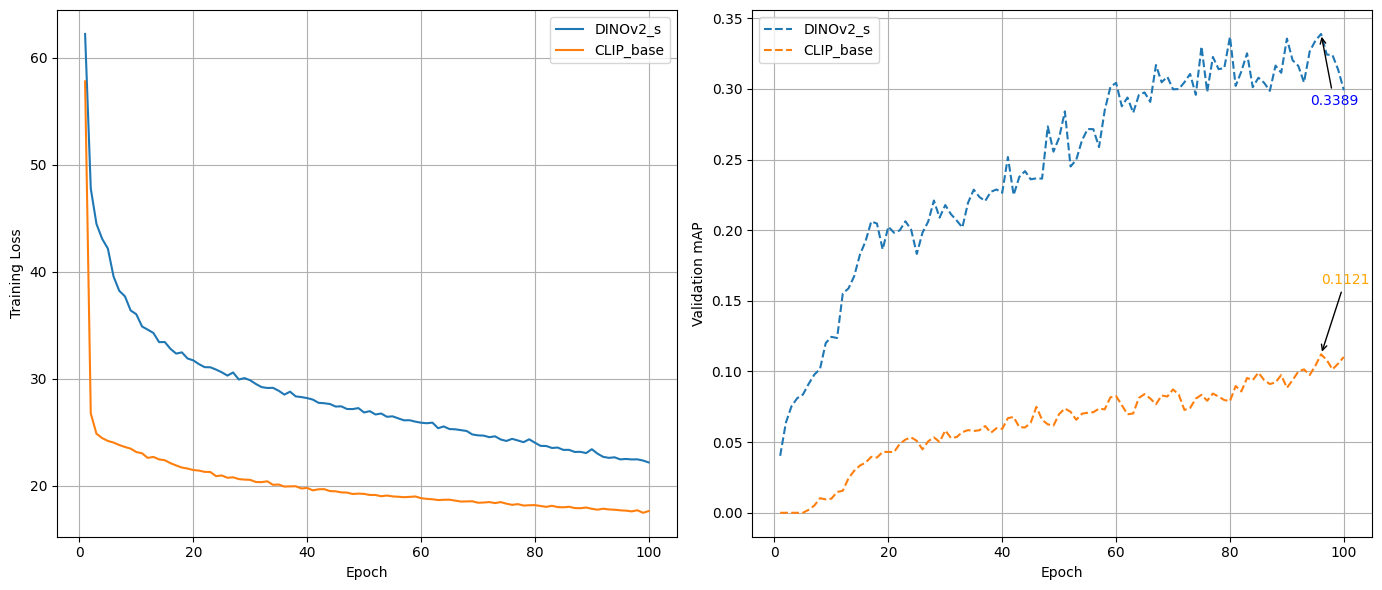

In [95]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cppe_dinov2s["Epoch"], cppe_dinov2s["Training Loss"], label="DINOv2_s", linestyle='-')
plt.plot(cppe_clipbase["Epoch"], cppe_clipbase["Training Loss"], label="CLIP_base", linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(cppe_dinov2s["Epoch"], cppe_dinov2s["Validation mAP"], label="DINOv2_s", linestyle='--')
plt.plot(cppe_clipbase["Epoch"], cppe_clipbase["Validation mAP"], label="CLIP_base", linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Validation mAP")
plt.legend()
plt.grid()

max_mAP_dino = cppe_dinov2s["Validation mAP"].max()
max_epoch_dino = cppe_dinov2s["Epoch"][cppe_dinov2s["Validation mAP"].idxmax()]
plt.annotate(f'{max_mAP_dino:.4f}', 
             xy=(max_epoch_dino, max_mAP_dino), 
             xytext=(max_epoch_dino - 2, max_mAP_dino - 0.05),
             arrowprops=dict(arrowstyle="->"), color='blue')

max_mAP_clip = cppe_clipbase["Validation mAP"].max()
max_epoch_clip = cppe_clipbase["Epoch"][cppe_clipbase["Validation mAP"].idxmax()]
plt.annotate(f'{max_mAP_clip:.4f}', 
             xy=(max_epoch_clip, max_mAP_clip), 
             xytext=(max_epoch_clip + 0, max_mAP_clip + 0.05),
             arrowprops=dict(arrowstyle="->"), color='orange')

plt.tight_layout()
plt.savefig("cppe.png", dpi=300)
plt.show()